In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from xarray import open_dataset
import arviz as az
from matplotlib import pyplot as plt, ticker


warnings.simplefilter(action="ignore", category=FutureWarning)

In [8]:
hist = np.load('unpooled/k1_sub4_approx_hist.npy')

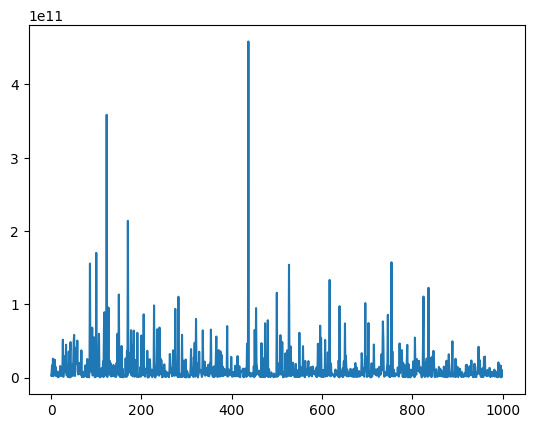

In [10]:
plt.plot(hist)

# test data

## unpooled 112 trials

In [12]:
inputfile = open('log/unpooled/unpooled_label')

In [13]:
df_fewtrials = pd.DataFrame(columns=['subj', 'acc', 'script','k'])

In [14]:
#for i in range(1471): inputfile.readline() # skip first 1470 lines

In [15]:
for i in range(3000):
    line = inputfile.readline()
    if 'unpooled_label.py' in line:
        if 'Subj num:' in line:
            strline = str(line)
            strline = strline[43:]
            subjnum = str(strline[:strline.find(' ')])
            if(int(subjnum)>9):
                strline = str(strline[strline.find(' ')+2:])
            else:
                strline = str(strline[strline.find(' ')+1:])
            strline = strline[strline.find(':')+2:]
            acc = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])
            strline = strline[strline.find(':')+2:]
            script = str(strline[:strline.find(',')])
            strline = str(strline[strline.find(' ')+1:])
            strline = strline[strline.find('dims')+6:]
            k = int(strline[:2])
            newdict = {'subj':subjnum,'acc':acc,'script':script,'k':k}

            df_fewtrials = df_fewtrials.append(newdict,ignore_index=True)


In [ ]:
df_fewtrials = df_fewtrials[:-3]
df_fewtrials

In [17]:
subjects_fewtrials = df_fewtrials['subj']
assert len(subjects_fewtrials)/df_fewtrials['k'].max() == len(df_fewtrials['subj'].unique())

In [18]:
list_y_few=[]
list_x_few=[]
for i in list(df_fewtrials['k'].unique()):
    list_y_few.append(df_fewtrials[df_fewtrials['k']==i]['acc'].mean())
    list_x_few.append(df_fewtrials[df_fewtrials['k']==i]['k'].unique())

<function matplotlib.pyplot.show(close=None, block=None)>

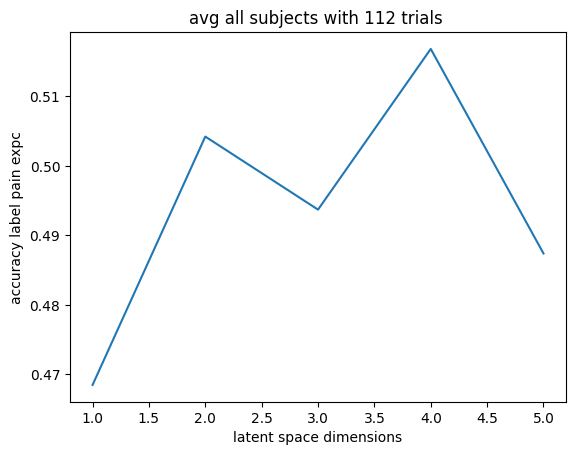

In [19]:
plt.plot(list_x_few,list_y_few)
plt.title('avg all subjects with 112 trials ')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy label pain expc')
plt.show

In [11]:
for i in list(df_fewtrials['subj'].unique()):
    y = df_fewtrials[df_fewtrials['subj']==i]['acc']
    x = df_fewtrials[df_fewtrials['subj']==i]['k']
    assert len(x)==len(y)
    plt.plot(x,y)
    plt.legend(['subj 4','subj 45','subj 50'])
    plt.xlabel('latent space dimension')
    plt.ylabel('accuracy label pain expc')
    plt.title('single model with 112 trials')

plt.show

NameError: name 'df_fewtrials' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

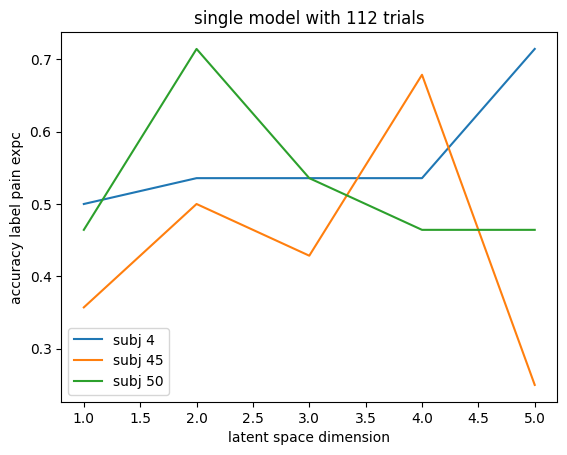

In [21]:
for i in list(['4','48','52']):
    y = df_fewtrials[df_fewtrials['subj']==i]['acc']
    x = df_fewtrials[df_fewtrials['subj']==i]['k']
    assert len(x)==len(y)
    plt.plot(x,y)
    plt.legend(['subj 4','subj 45','subj 50'])
    plt.xlabel('latent space dimension')
    plt.ylabel('accuracy label pain expc')
    plt.title('single model with 112 trials')

plt.show

# analyze posterior predictive

In [25]:
posterior = open_dataset('unpooled/k1_sub2_posterior.h5', engine='scipy')

In [ ]:
az.plot_posterior(posterior)

# ADVI analyze trace k1 sub2 acc 0.5

In [6]:
trace = az.from_netcdf('unpooled/k1_sub2_trace.nc')

array([[<AxesSubplot: title={'center': 'Whr'}>,
        <AxesSubplot: title={'center': 'Whr'}>],
       [<AxesSubplot: title={'center': 'Wpupil'}>,
        <AxesSubplot: title={'center': 'Wpupil'}>],
       [<AxesSubplot: title={'center': 'Weda'}>,
        <AxesSubplot: title={'center': 'Weda'}>],
       [<AxesSubplot: title={'center': 'W_e'}>,
        <AxesSubplot: title={'center': 'W_e'}>],
       [<AxesSubplot: title={'center': 'c'}>,
        <AxesSubplot: title={'center': 'c'}>],
       [<AxesSubplot: title={'center': 'mu_hr'}>,
        <AxesSubplot: title={'center': 'mu_hr'}>],
       [<AxesSubplot: title={'center': 'mu_pupil'}>,
        <AxesSubplot: title={'center': 'mu_pupil'}>],
       [<AxesSubplot: title={'center': 'mu_eda'}>,
        <AxesSubplot: title={'center': 'mu_eda'}>],
       [<AxesSubplot: title={'center': 'sigma_hr'}>,
        <AxesSubplot: title={'center': 'sigma_hr'}>],
       [<AxesSubplot: title={'center': 'sigma_pupil'}>,
        <AxesSubplot: title={'center'

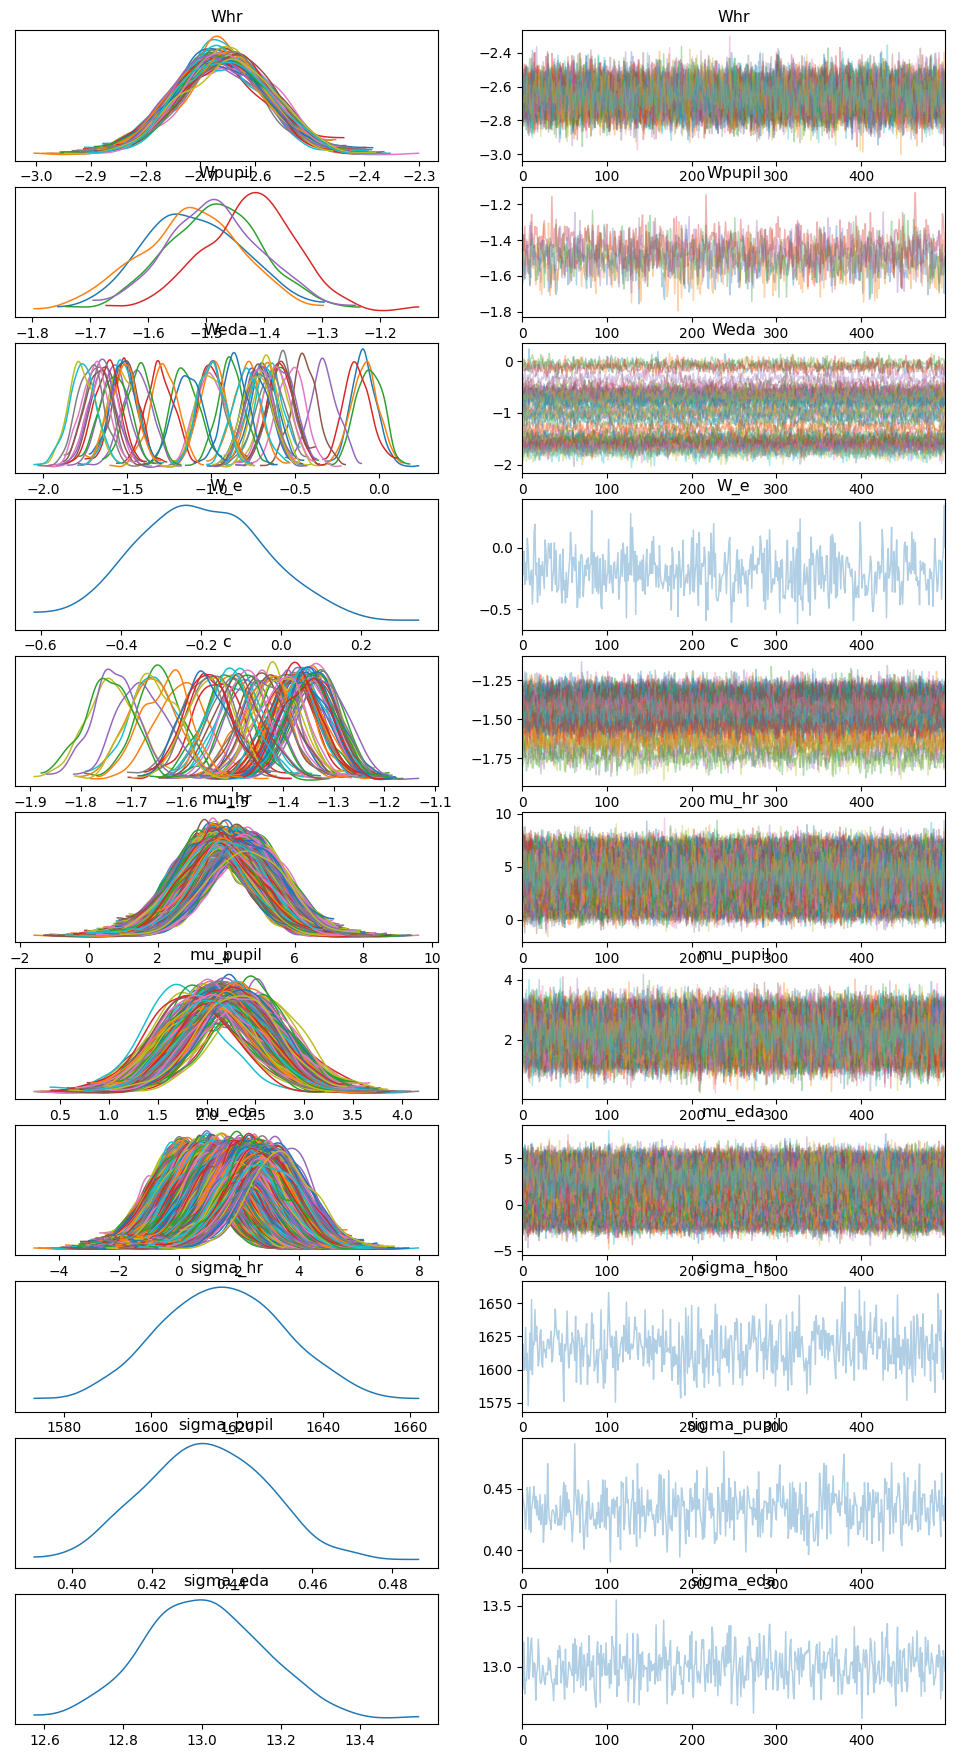

In [7]:
az.plot_trace(trace)

array([[<AxesSubplot: title={'center': 'Whr\n0, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n1, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n2, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n3, 0'}>],
       [<AxesSubplot: title={'center': 'Whr\n4, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n5, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n6, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n7, 0'}>],
       [<AxesSubplot: title={'center': 'Whr\n8, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n9, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n10, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n11, 0'}>],
       [<AxesSubplot: title={'center': 'Whr\n12, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n13, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n14, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n15, 0'}>],
       [<AxesSubplot: title={'center': 'Whr\n16, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n17, 0'}>,
        <AxesSub

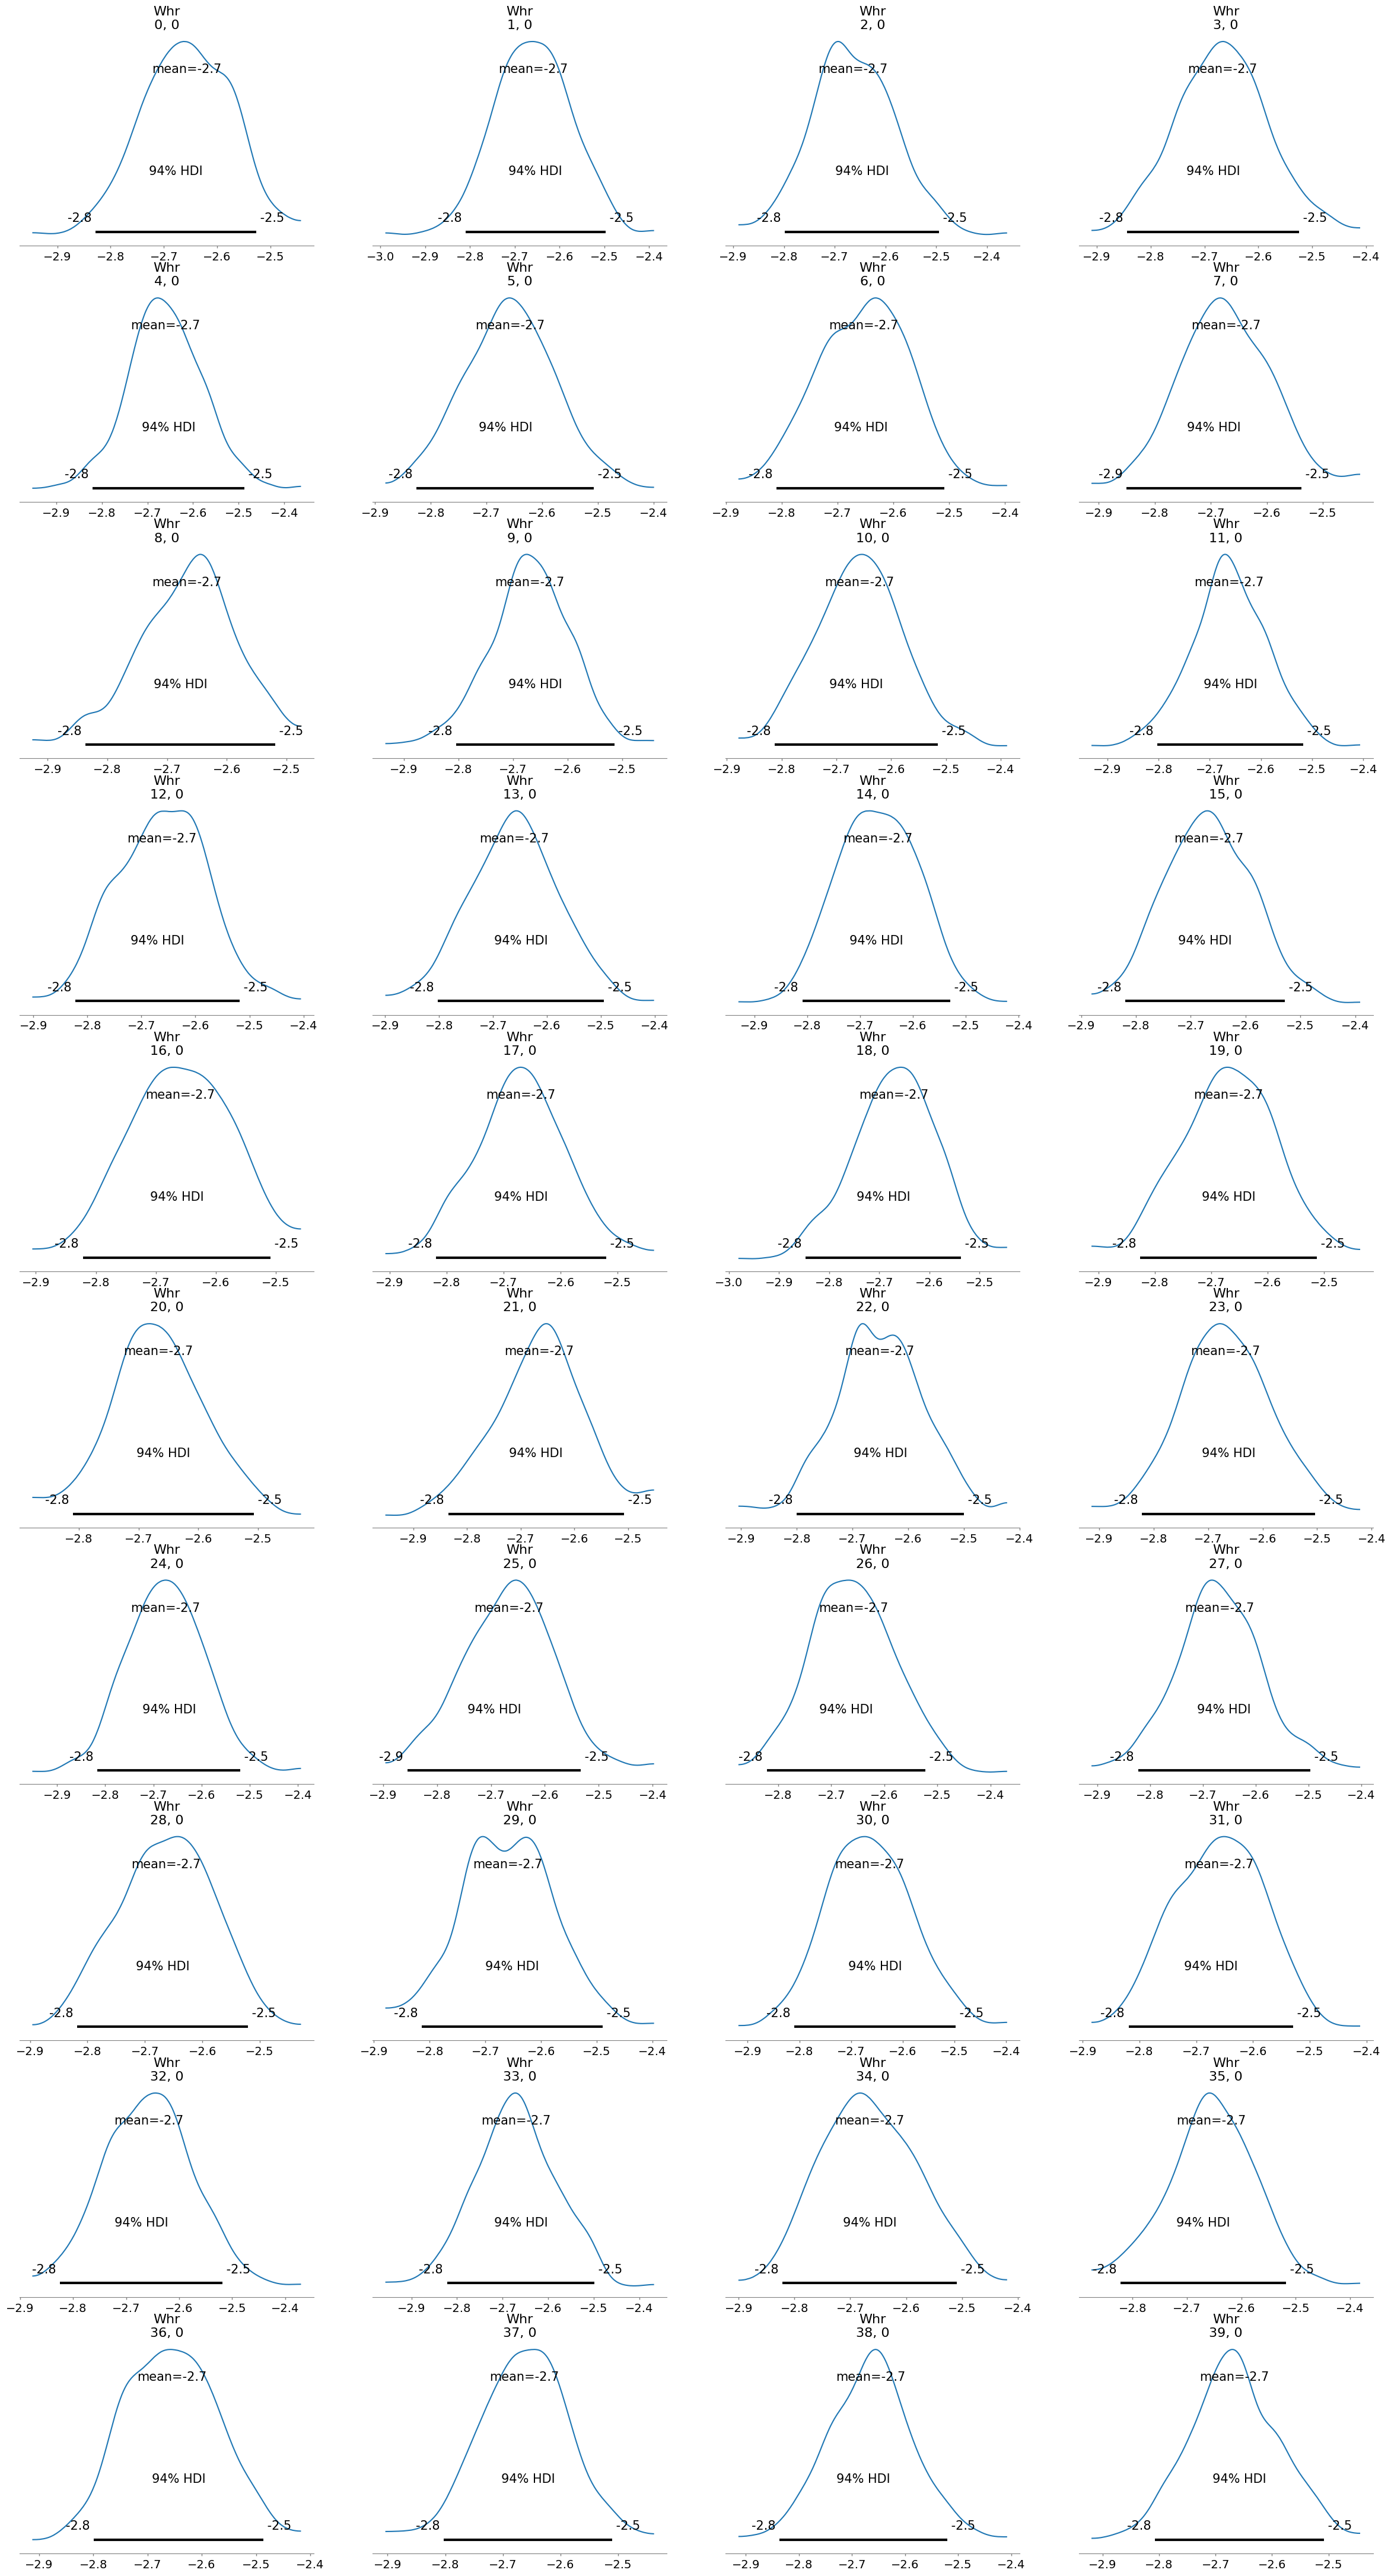

In [11]:
az.plot_posterior(trace)

/home/paolo/matteo/matteo/unimi/tesi_master/code/my_env/lib/python3.8/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (84) in plot_autocorr, generating only 40 plots
  warnings.warn(


array([[<AxesSubplot: title={'center': 'c\n0, 0'}>,
        <AxesSubplot: title={'center': 'c\n1, 0'}>,
        <AxesSubplot: title={'center': 'c\n2, 0'}>,
        <AxesSubplot: title={'center': 'c\n3, 0'}>],
       [<AxesSubplot: title={'center': 'c\n4, 0'}>,
        <AxesSubplot: title={'center': 'c\n5, 0'}>,
        <AxesSubplot: title={'center': 'c\n6, 0'}>,
        <AxesSubplot: title={'center': 'c\n7, 0'}>],
       [<AxesSubplot: title={'center': 'c\n8, 0'}>,
        <AxesSubplot: title={'center': 'c\n9, 0'}>,
        <AxesSubplot: title={'center': 'c\n10, 0'}>,
        <AxesSubplot: title={'center': 'c\n11, 0'}>],
       [<AxesSubplot: title={'center': 'c\n12, 0'}>,
        <AxesSubplot: title={'center': 'c\n13, 0'}>,
        <AxesSubplot: title={'center': 'c\n14, 0'}>,
        <AxesSubplot: title={'center': 'c\n15, 0'}>],
       [<AxesSubplot: title={'center': 'c\n16, 0'}>,
        <AxesSubplot: title={'center': 'c\n17, 0'}>,
        <AxesSubplot: title={'center': 'c\n18, 0'}>,

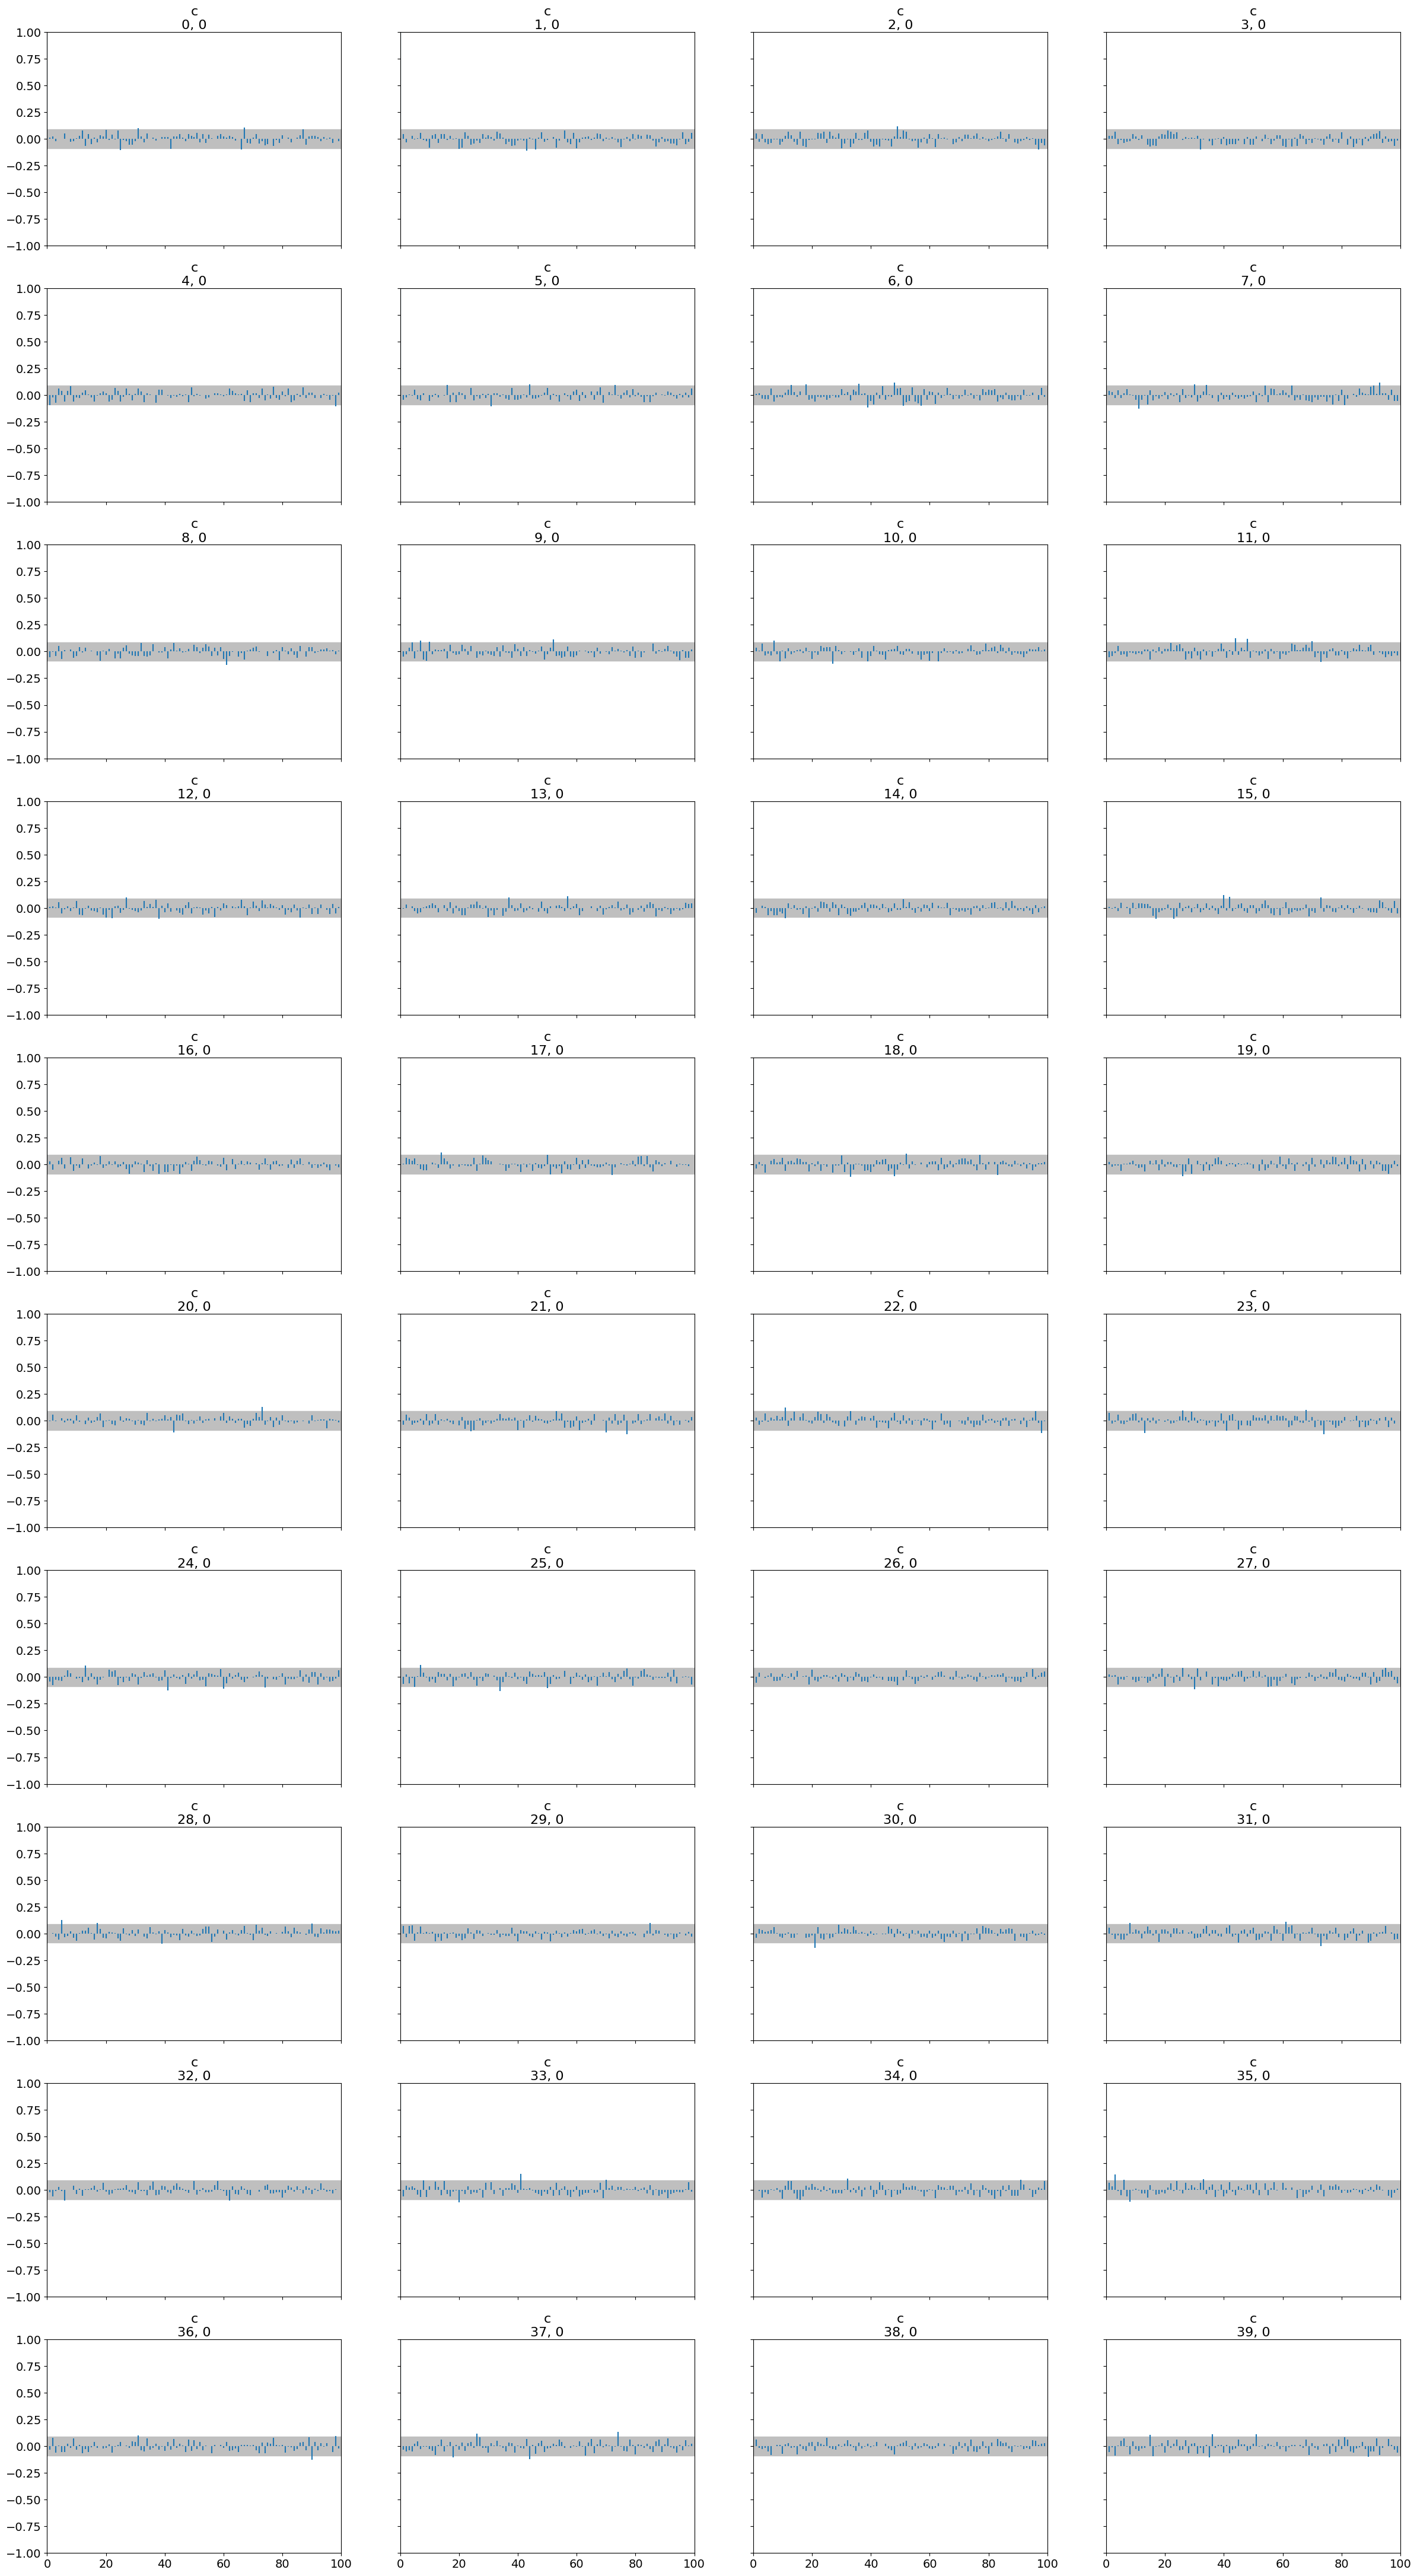

In [10]:
az.plot_autocorr(trace, var_names=['c'], combined=True)

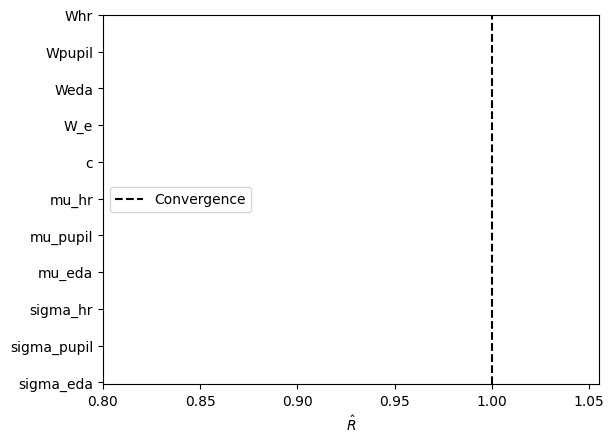

In [9]:
fig, ax = plt.subplots()

max_rhat = (az.rhat(trace)
               .max()
               .to_array())
nvar, = max_rhat.shape

ax.barh(np.arange(nvar), max_rhat);
ax.axvline(1, c='k', ls='--', label="Convergence");

ax.set_xlim(left=0.8);
ax.set_xlabel(r"$\hat{R}$");

ax.set_yticks(np.arange(nvar));
ax.set_yticklabels(max_rhat.coords["variable"].to_numpy()[::-1]);

ax.legend();



In [14]:
trace

Inference data with groups:
	> posterior
	> observed_data
	> constant_data

In [13]:
plt.plot(trace.posterior.hist)
plt.ylabel('ELBO')
plt.xlabel('iteration');

AttributeError: 'Dataset' object has no attribute 'hist'

# ADVI analyze trace k1 sub10 acc 0.6

In [12]:
trace = az.from_netcdf('unpooled/k1_sub10_trace.nc')

In [13]:
trace

Inference data with groups:
	> posterior
	> observed_data
	> constant_data

array([[<AxesSubplot: title={'center': 'Whr'}>,
        <AxesSubplot: title={'center': 'Whr'}>],
       [<AxesSubplot: title={'center': 'Wpupil'}>,
        <AxesSubplot: title={'center': 'Wpupil'}>],
       [<AxesSubplot: title={'center': 'Weda'}>,
        <AxesSubplot: title={'center': 'Weda'}>],
       [<AxesSubplot: title={'center': 'W_e'}>,
        <AxesSubplot: title={'center': 'W_e'}>],
       [<AxesSubplot: title={'center': 'c'}>,
        <AxesSubplot: title={'center': 'c'}>],
       [<AxesSubplot: title={'center': 'mu_hr'}>,
        <AxesSubplot: title={'center': 'mu_hr'}>],
       [<AxesSubplot: title={'center': 'mu_pupil'}>,
        <AxesSubplot: title={'center': 'mu_pupil'}>],
       [<AxesSubplot: title={'center': 'mu_eda'}>,
        <AxesSubplot: title={'center': 'mu_eda'}>],
       [<AxesSubplot: title={'center': 'sigma_hr'}>,
        <AxesSubplot: title={'center': 'sigma_hr'}>],
       [<AxesSubplot: title={'center': 'sigma_pupil'}>,
        <AxesSubplot: title={'center'

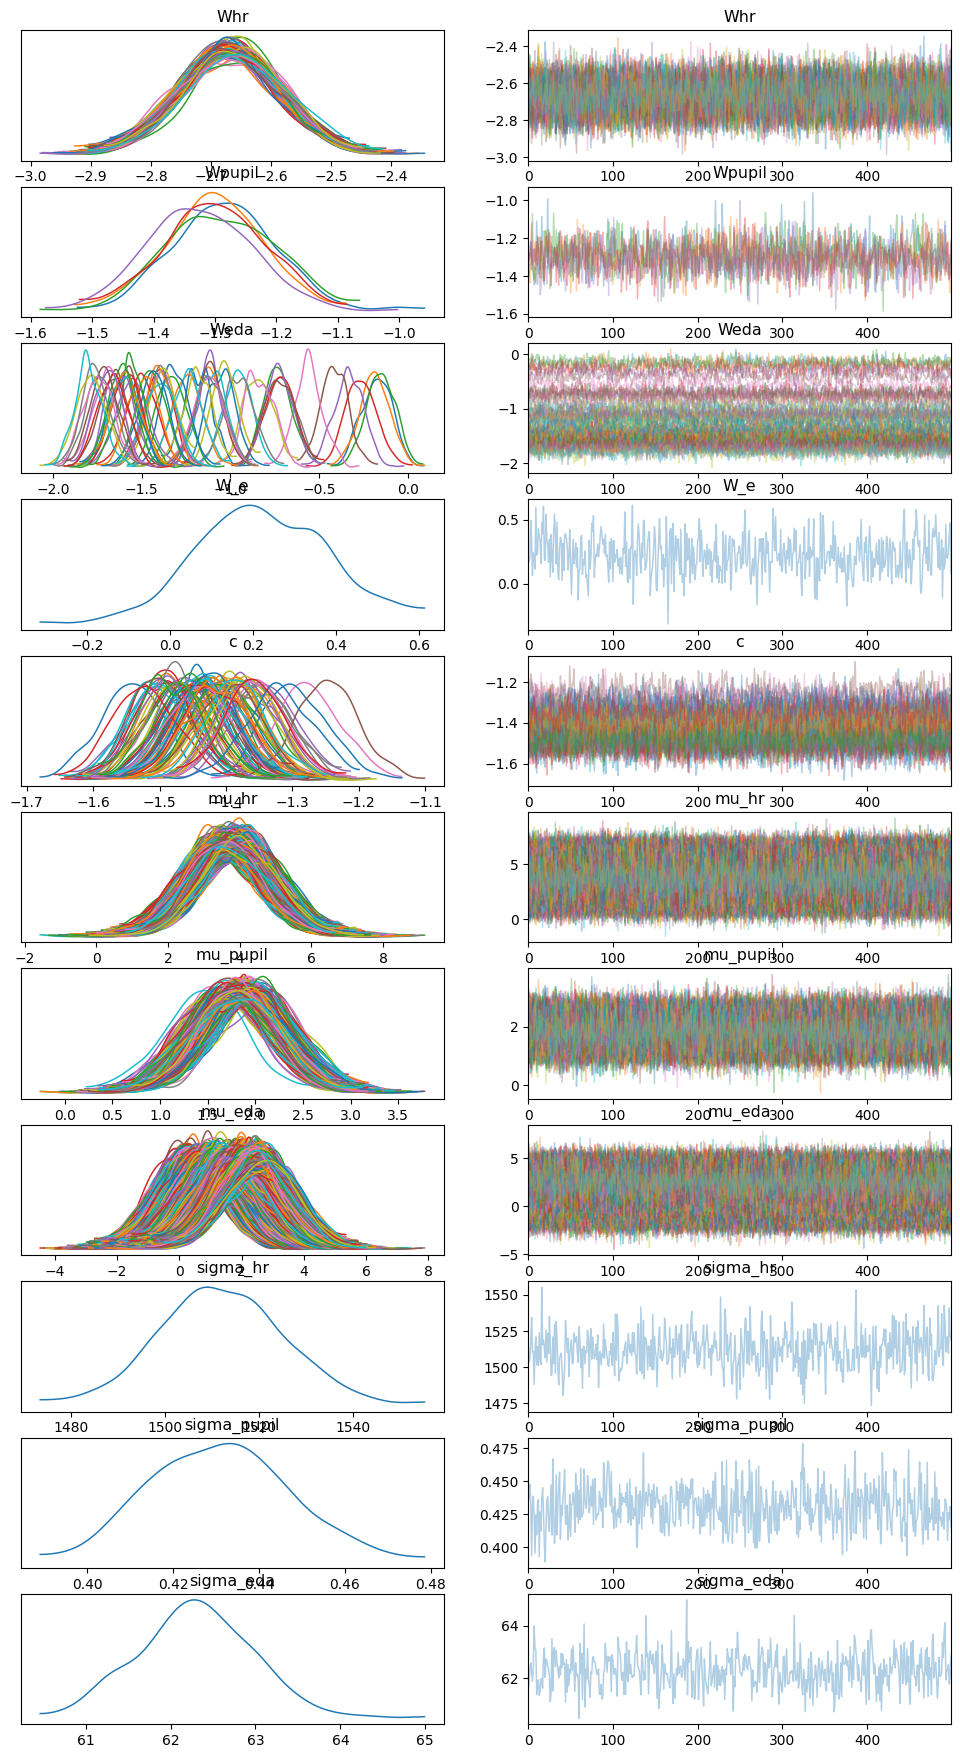

In [14]:
az.plot_trace(trace)

/home/paolo/matteo/matteo/unimi/tesi_master/code/my_env/lib/python3.8/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (10713) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<AxesSubplot: title={'center': 'Whr\n0, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n1, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n2, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n3, 0'}>],
       [<AxesSubplot: title={'center': 'Whr\n4, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n5, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n6, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n7, 0'}>],
       [<AxesSubplot: title={'center': 'Whr\n8, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n9, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n10, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n11, 0'}>],
       [<AxesSubplot: title={'center': 'Whr\n12, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n13, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n14, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n15, 0'}>],
       [<AxesSubplot: title={'center': 'Whr\n16, 0'}>,
        <AxesSubplot: title={'center': 'Whr\n17, 0'}>,
        <AxesSub

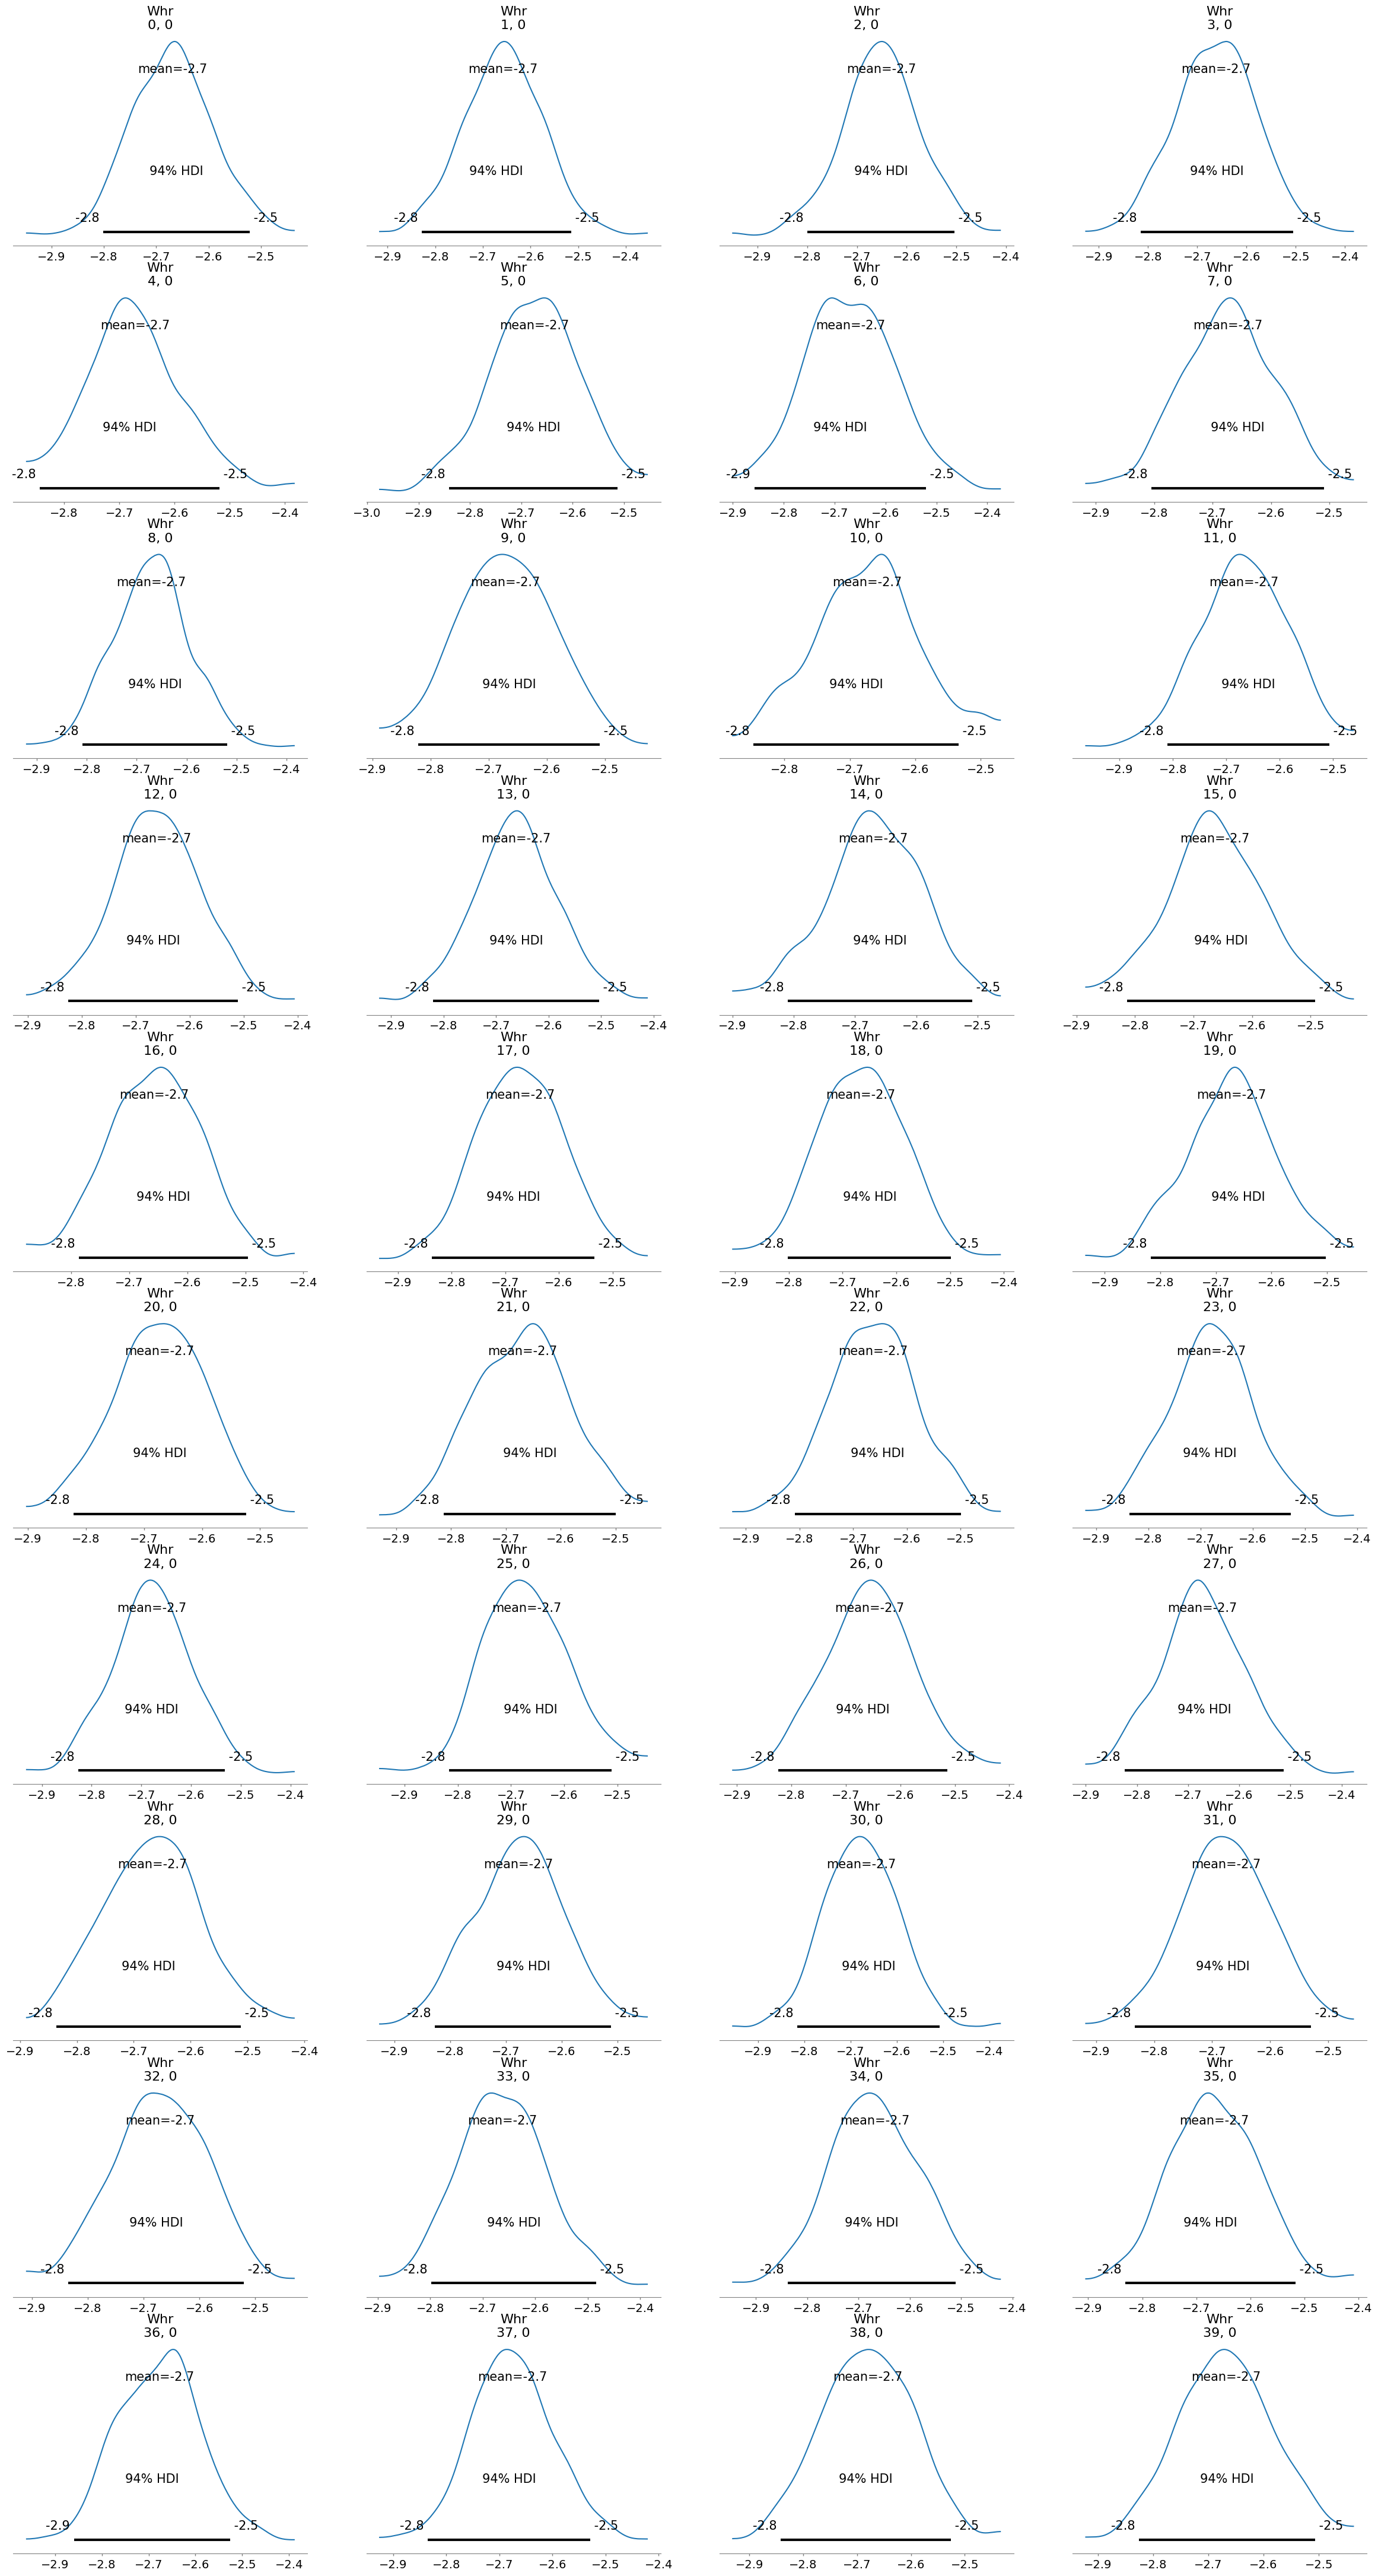

In [15]:
az.plot_posterior(trace)

/home/paolo/matteo/matteo/unimi/tesi_master/code/my_env/lib/python3.8/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (60) in plot_autocorr, generating only 40 plots
  warnings.warn(


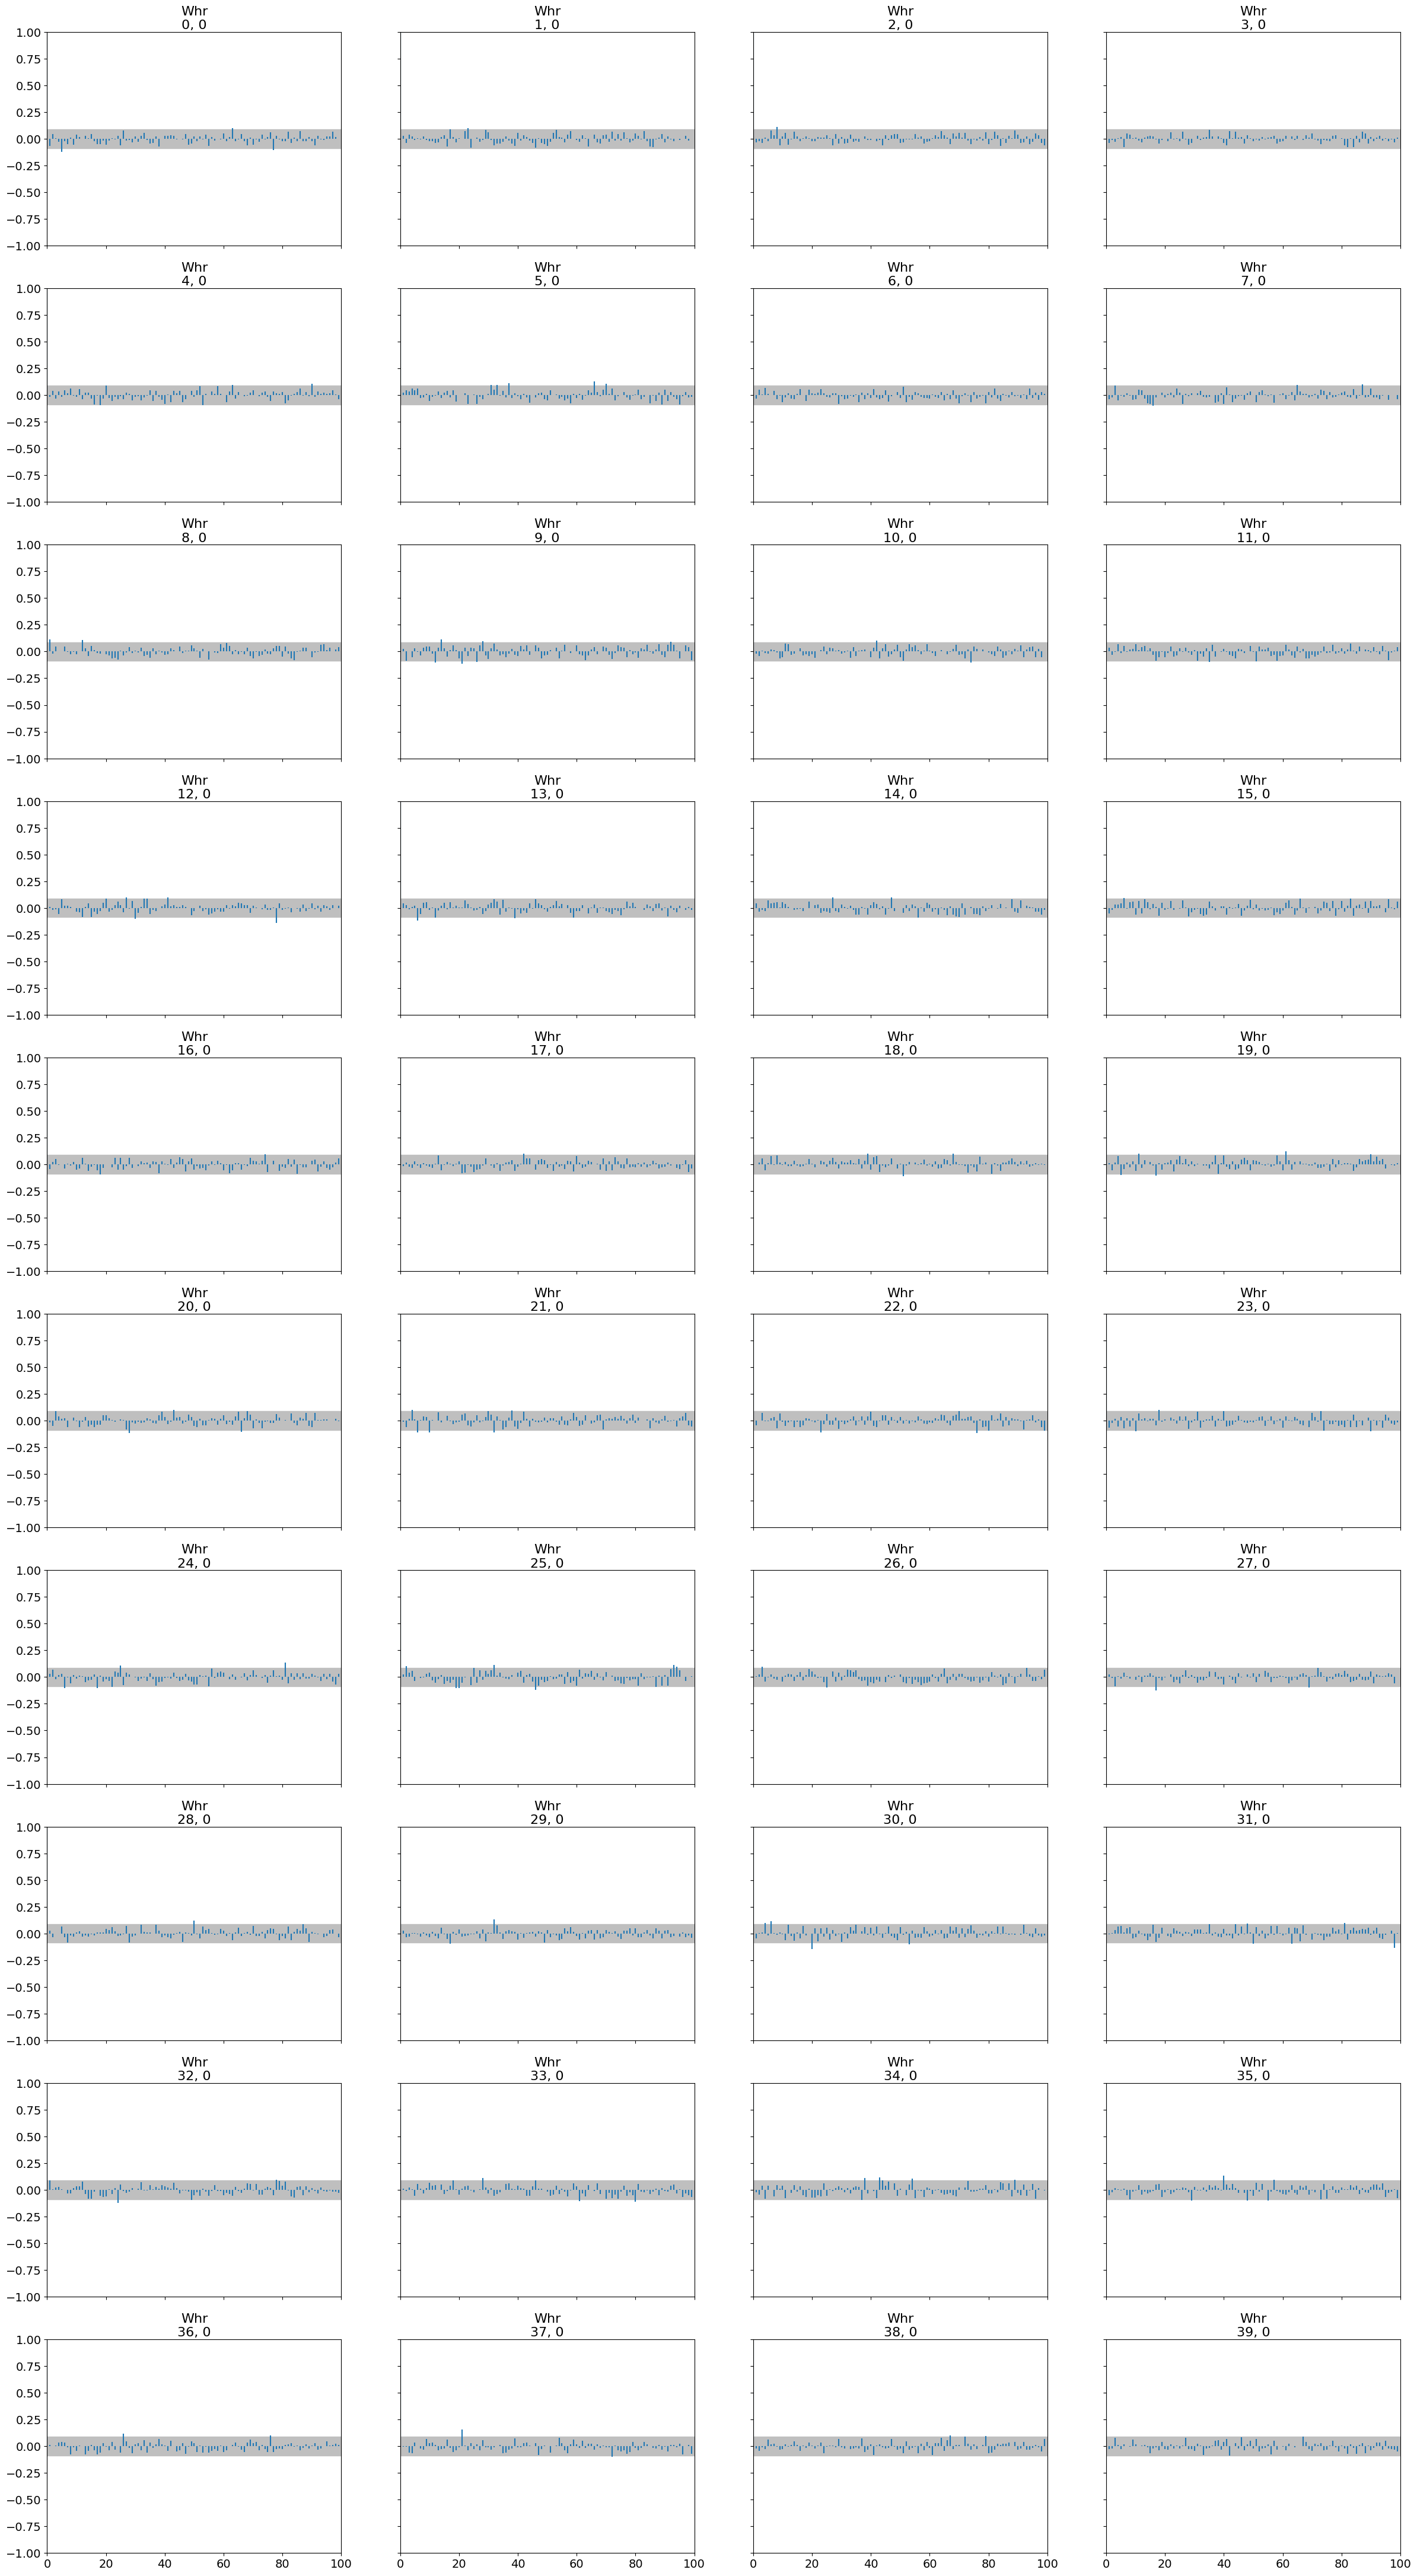

In [16]:
az.plot_autocorr(trace, var_names=['Whr'], combined=True)

In [16]:
trace

Inference data with groups:
	> posterior
	> observed_data
	> constant_data

In [18]:
az.plot_ppc(trace.posterior)

TypeError: `data` argument must have the group "posterior_predictive" for ppcplot

# JAX MCMC 10000 k1 sub2

In [5]:
trace = az.from_netcdf('unpooled/jax_10000_k1_sub2_trace.nc')

/home/paolo/matteo/matteo/unimi/tesi_master/code/my_env/lib/python3.8/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/home/paolo/matteo/matteo/unimi/tesi_master/code/my_env/lib/python3.8/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/home/paolo/matteo/matteo/unimi/tesi_master/code/my_env/lib/python3.8/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/home/paolo/matteo/matteo/unimi/tesi_master/code/my_env/lib/python3.8/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite

array([[<AxesSubplot: title={'center': 'Whr'}>,
        <AxesSubplot: title={'center': 'Whr'}>],
       [<AxesSubplot: title={'center': 'Wpupil'}>,
        <AxesSubplot: title={'center': 'Wpupil'}>],
       [<AxesSubplot: title={'center': 'Weda'}>,
        <AxesSubplot: title={'center': 'Weda'}>],
       [<AxesSubplot: title={'center': 'W_e'}>,
        <AxesSubplot: title={'center': 'W_e'}>],
       [<AxesSubplot: title={'center': 'c'}>,
        <AxesSubplot: title={'center': 'c'}>],
       [<AxesSubplot: title={'center': 'mu_hr'}>,
        <AxesSubplot: title={'center': 'mu_hr'}>],
       [<AxesSubplot: title={'center': 'mu_pupil'}>,
        <AxesSubplot: title={'center': 'mu_pupil'}>],
       [<AxesSubplot: title={'center': 'mu_eda'}>,
        <AxesSubplot: title={'center': 'mu_eda'}>],
       [<AxesSubplot: title={'center': 'sigma_hr'}>,
        <AxesSubplot: title={'center': 'sigma_hr'}>],
       [<AxesSubplot: title={'center': 'sigma_pupil'}>,
        <AxesSubplot: title={'center'

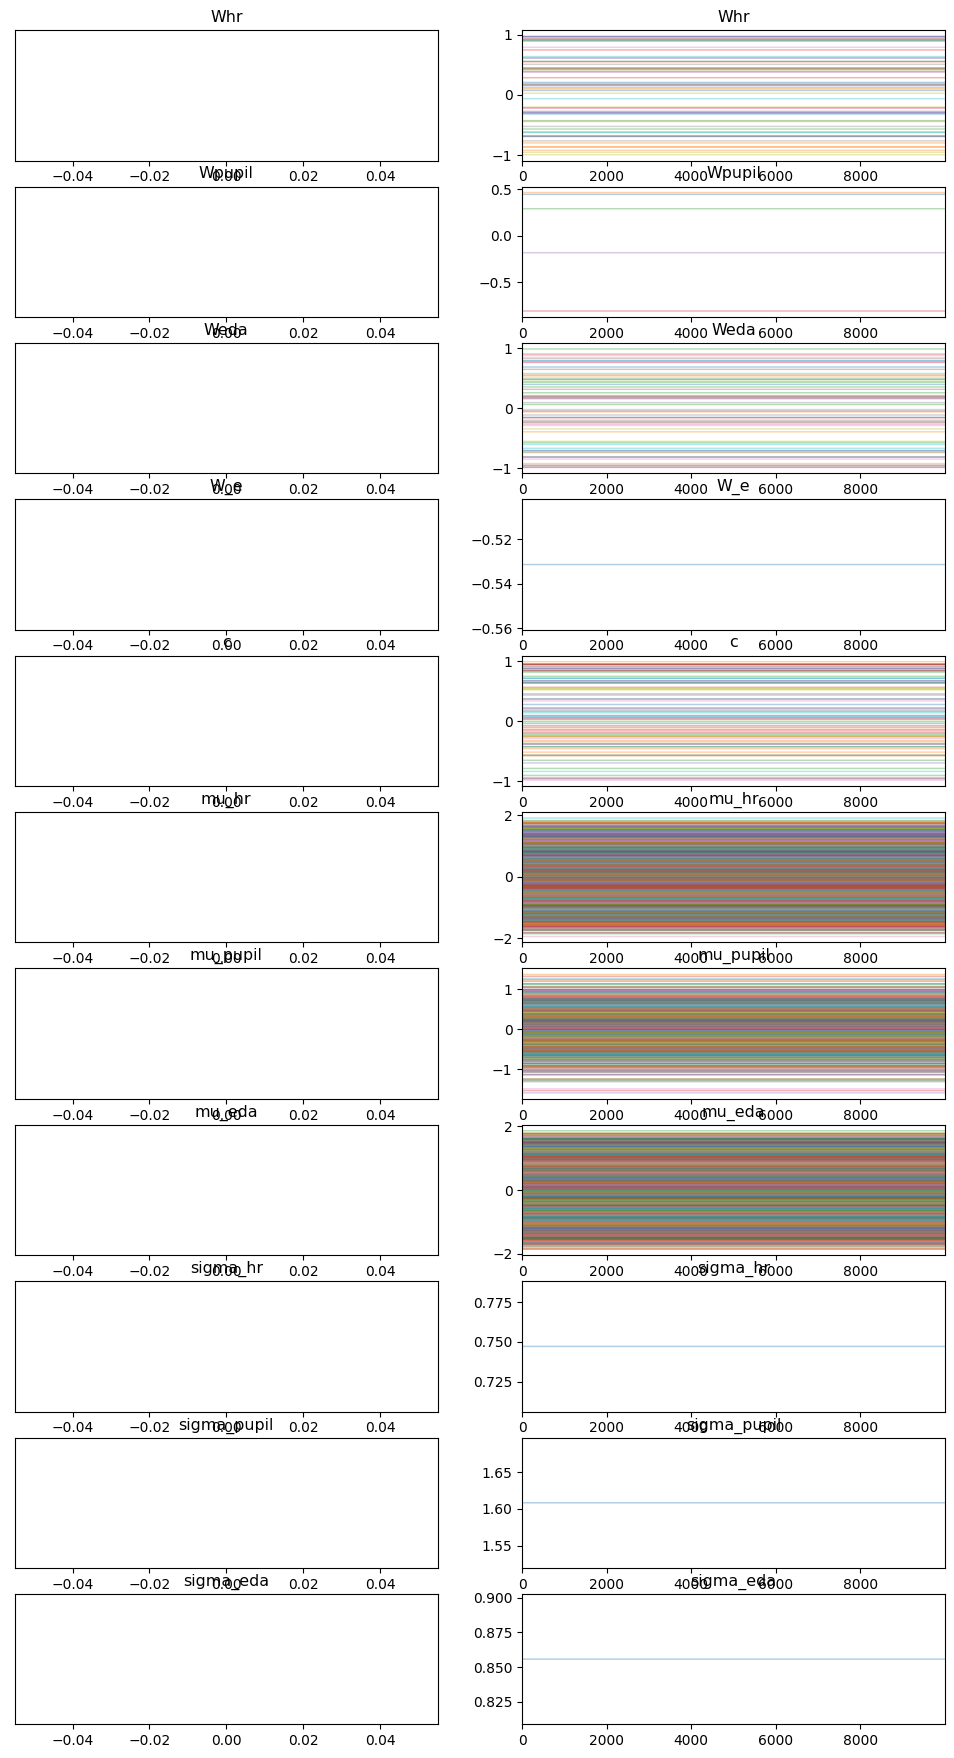

In [6]:
az.plot_trace(trace)

trace

In [7]:
az.plot_posterior(trace)


KeyboardInterrupt



# bella function

In [31]:
def funct(logfile,filename_py,type_="label",removelastsubjects=0):
    inputfile = open(logfile)
    if type_=='label':
        df = pd.DataFrame(columns=['subj', 'acc', 'script','k'])
        for i in range(3000):
            line = inputfile.readline()
            if filename_py in line:
                if 'Subj num:' in line:
                    strline = str(line)

                    strline = strline[43:]
                    subjnum = str(strline[:strline.find(' ')])
                    if(int(subjnum)>9):
                        strline = str(strline[strline.find(' ')+2:])
                    else:
                        strline = str(strline[strline.find(' ')+1:])

                    strline = strline[strline.find(':')+2:]
                    acc = float(strline[:strline.find(' ')])
                    strline = str(strline[strline.find(' ')+1:])

                    strline = strline[strline.find(':')+2:]
                    script = str(strline[:strline.find(',')])
                    strline = str(strline[strline.find(' ')+1:])
                    strline = strline[strline.find('dims')+6:]
                    k = int(strline[:2])
                    newdict = {'subj':subjnum,'acc':acc,'script':script,'k':k}

                    df = df.append(newdict,ignore_index=True)

        if removelastsubjects>0:
                df = df[:-removelastsubjects]

        subjects = df['subj']
        assert len(subjects) / df['k'].max() == len(df['subj'].unique())
        list_y = []
        list_x = []
        for i in list(df['k'].unique()):
            list_y.append(df[df['k'] == i]['acc'].mean())
            list_x.append(df[df['k'] == i]['k'].unique())

        return list_x,list_y

    else:
        if type == 'eda':
            df = pd.DataFrame(columns=['subj', 'pear', 'conc', 'script','k'])

            for i in range(3000):
                line = inputfile.readline()
                if filename_py in line:
                    if 'Subj num:' in line:
                        strline = str(line)

                        strline = strline[43:]
                        subjnum = str(strline[:strline.find(' ')])
                        if(int(subjnum)>9):
                            strline = str(strline[strline.find(' ')+2:])
                        else:
                            strline = str(strline[strline.find(' ')+1:])

                        strline = strline[strline.find(':')+2:]
                        pear = float(strline[:strline.find(' ')])
                        strline = str(strline[strline.find(' ')+1:])

                        strline = strline[strline.find(':')+2:]
                        conc = float(strline[:strline.find(' ')])
                        strline = str(strline[strline.find(' ')+1:])

                        strline = strline[strline.find(':')+2:]
                        script = str(strline[:strline.find(',')])
                        strline = str(strline[strline.find(' ')+1:])

                        strline = strline[strline.find('dims')+6:]
                        k = int(strline[:2])

                        newdict = {'subj':subjnum,'pear':pear,'conc':conc, 'script':script,'k':k}

                        df = df.append(newdict,ignore_index=True)

            if removelastsubjects>0:
                df = df[:-removelastsubjects]

            subjects = df['subj']
            assert len(subjects)/df['k'].max() == len(df['subj'].unique())
            list_y_conc=[]
            list_y_pear = []
            list_x=[]
            for i in list(df['k'].unique()):
                list_y_pear.append(df[df['k']==i]['pear'].mean())
                list_y_conc.append(df[df['k']==i]['conc'].mean())
                list_x.append(df[df['k']==i]['k'].unique())

            return list_x,list_y_pear,list_y_conc

        else:
            print("type_ not correct")
            return None

# ADVI 1e6 NEW FEAT EXTRACT

In [ ]:
x_new, y_new = funct('log/unpooled/newfeatwind/unpooled_labelADVI1e6','unpooled_label_newfeatwind.py')

<function matplotlib.pyplot.show(close=None, block=None)>

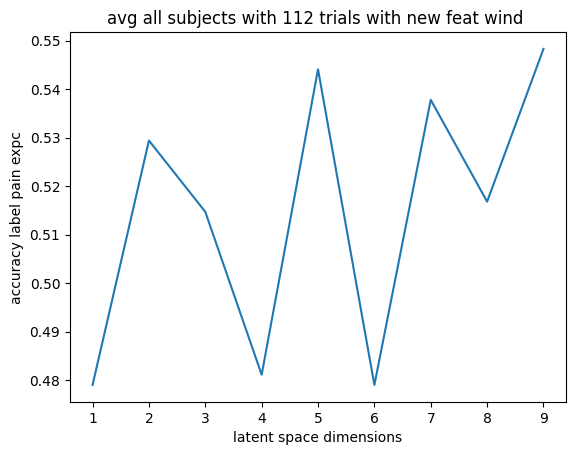

In [24]:
plt.plot(x_new,y_new)
plt.title('avg all subjects with 112 trials with new feat wind ')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy label pain expc')
plt.show

# ADVI 1e6 NEW FEAT EXTRACT WITHOUT PUPIL

In [ ]:
x_new_nopupil, y_new_nopupil = funct('log/unpooled/newfeatwind/nopupil/unpooled_labelADVI1e6','unpooled_label_newfeatwind_nopupil.py')

<function matplotlib.pyplot.show(close=None, block=None)>

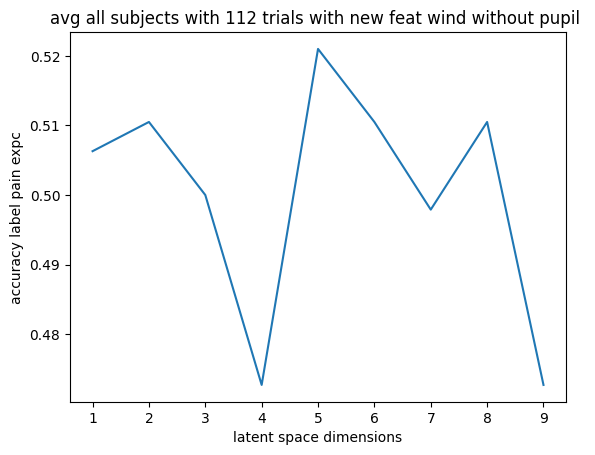

In [27]:
plt.plot(x_new_nopupil,y_new_nopupil)
plt.title('avg all subjects with 112 trials with new feat wind without pupil ')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy label pain expc')
plt.show

array([[<AxesSubplot: title={'center': 'Whr'}>,
        <AxesSubplot: title={'center': 'Whr'}>],
       [<AxesSubplot: title={'center': 'Weda'}>,
        <AxesSubplot: title={'center': 'Weda'}>],
       [<AxesSubplot: title={'center': 'W_e'}>,
        <AxesSubplot: title={'center': 'W_e'}>],
       [<AxesSubplot: title={'center': 'c'}>,
        <AxesSubplot: title={'center': 'c'}>],
       [<AxesSubplot: title={'center': 'mu_hr'}>,
        <AxesSubplot: title={'center': 'mu_hr'}>],
       [<AxesSubplot: title={'center': 'mu_eda'}>,
        <AxesSubplot: title={'center': 'mu_eda'}>],
       [<AxesSubplot: title={'center': 'sigma_hr'}>,
        <AxesSubplot: title={'center': 'sigma_hr'}>],
       [<AxesSubplot: title={'center': 'sigma_eda'}>,
        <AxesSubplot: title={'center': 'sigma_eda'}>]], dtype=object)

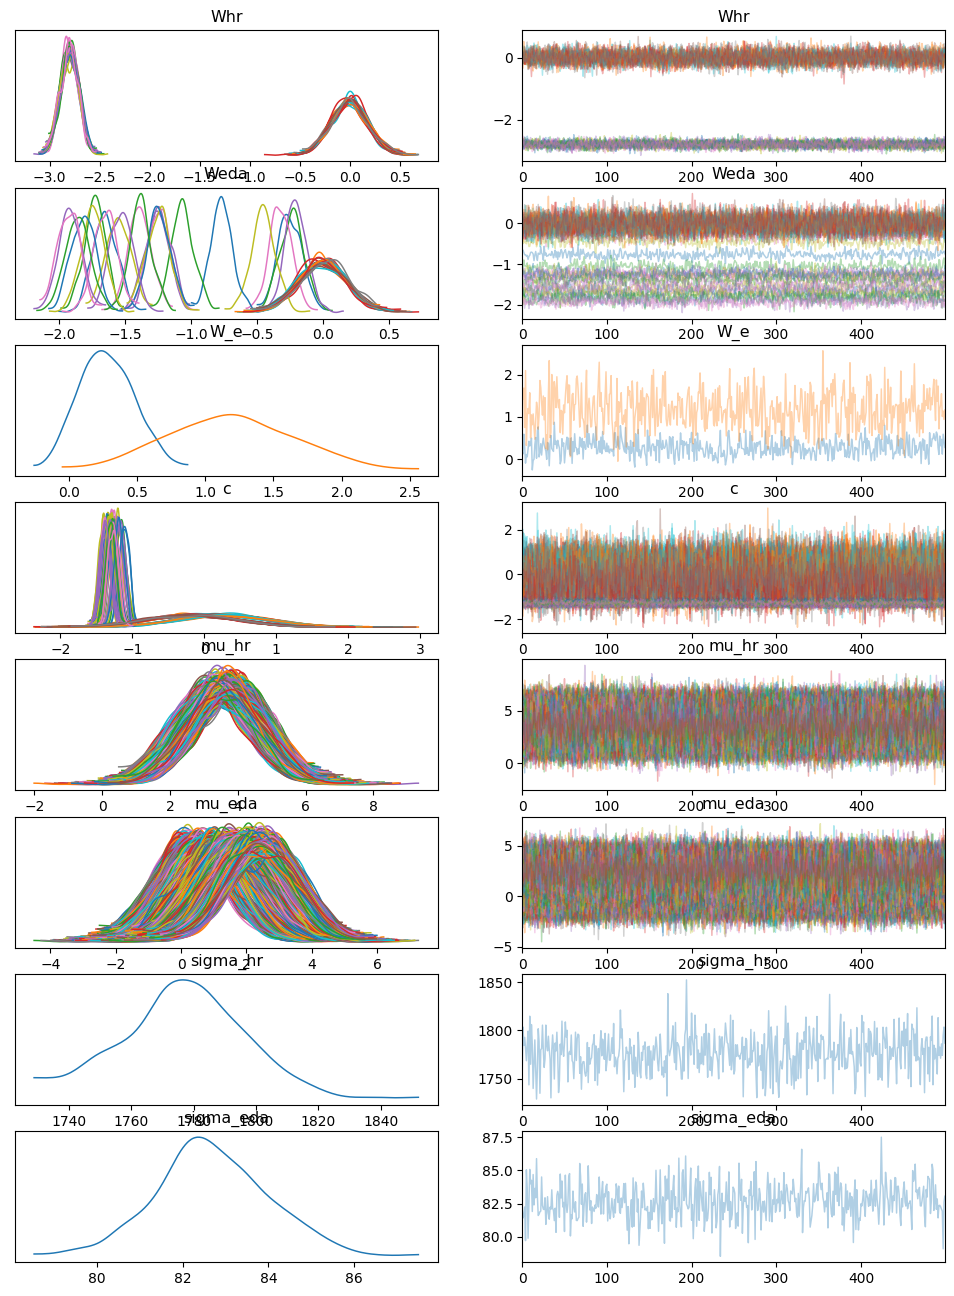

In [29]:
trace = az.from_netcdf('unpooled/newfeatwind/nopupil/k2_sub10_trace.nc')
az.plot_trace(trace)

# SVGD

In [ ]:
x_new_svgd, y_new_svgd = funct('log/unpooled/svgd','unpooled_label_svgd.py',removelastsubjects=12)

<function matplotlib.pyplot.show(close=None, block=None)>

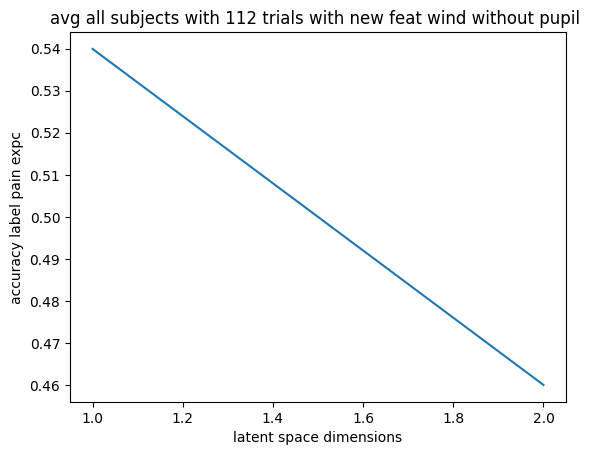

In [33]:
plt.plot(x_new_svgd,y_new_svgd)
plt.title('avg all subjects with 112 trials with new feat wind without pupil ')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy label pain expc')
plt.show

In [45]:
trace = az.from_netcdf('unpooled/svgd/k1_sub2_trace.nc')

array([[<AxesSubplot: title={'center': 'Whr'}>,
        <AxesSubplot: title={'center': 'Whr'}>],
       [<AxesSubplot: title={'center': 'Wpupil'}>,
        <AxesSubplot: title={'center': 'Wpupil'}>],
       [<AxesSubplot: title={'center': 'Weda'}>,
        <AxesSubplot: title={'center': 'Weda'}>],
       [<AxesSubplot: title={'center': 'W_e'}>,
        <AxesSubplot: title={'center': 'W_e'}>],
       [<AxesSubplot: title={'center': 'c'}>,
        <AxesSubplot: title={'center': 'c'}>],
       [<AxesSubplot: title={'center': 'mu_hr'}>,
        <AxesSubplot: title={'center': 'mu_hr'}>],
       [<AxesSubplot: title={'center': 'mu_pupil'}>,
        <AxesSubplot: title={'center': 'mu_pupil'}>],
       [<AxesSubplot: title={'center': 'mu_eda'}>,
        <AxesSubplot: title={'center': 'mu_eda'}>],
       [<AxesSubplot: title={'center': 'sigma_hr'}>,
        <AxesSubplot: title={'center': 'sigma_hr'}>],
       [<AxesSubplot: title={'center': 'sigma_pupil'}>,
        <AxesSubplot: title={'center'

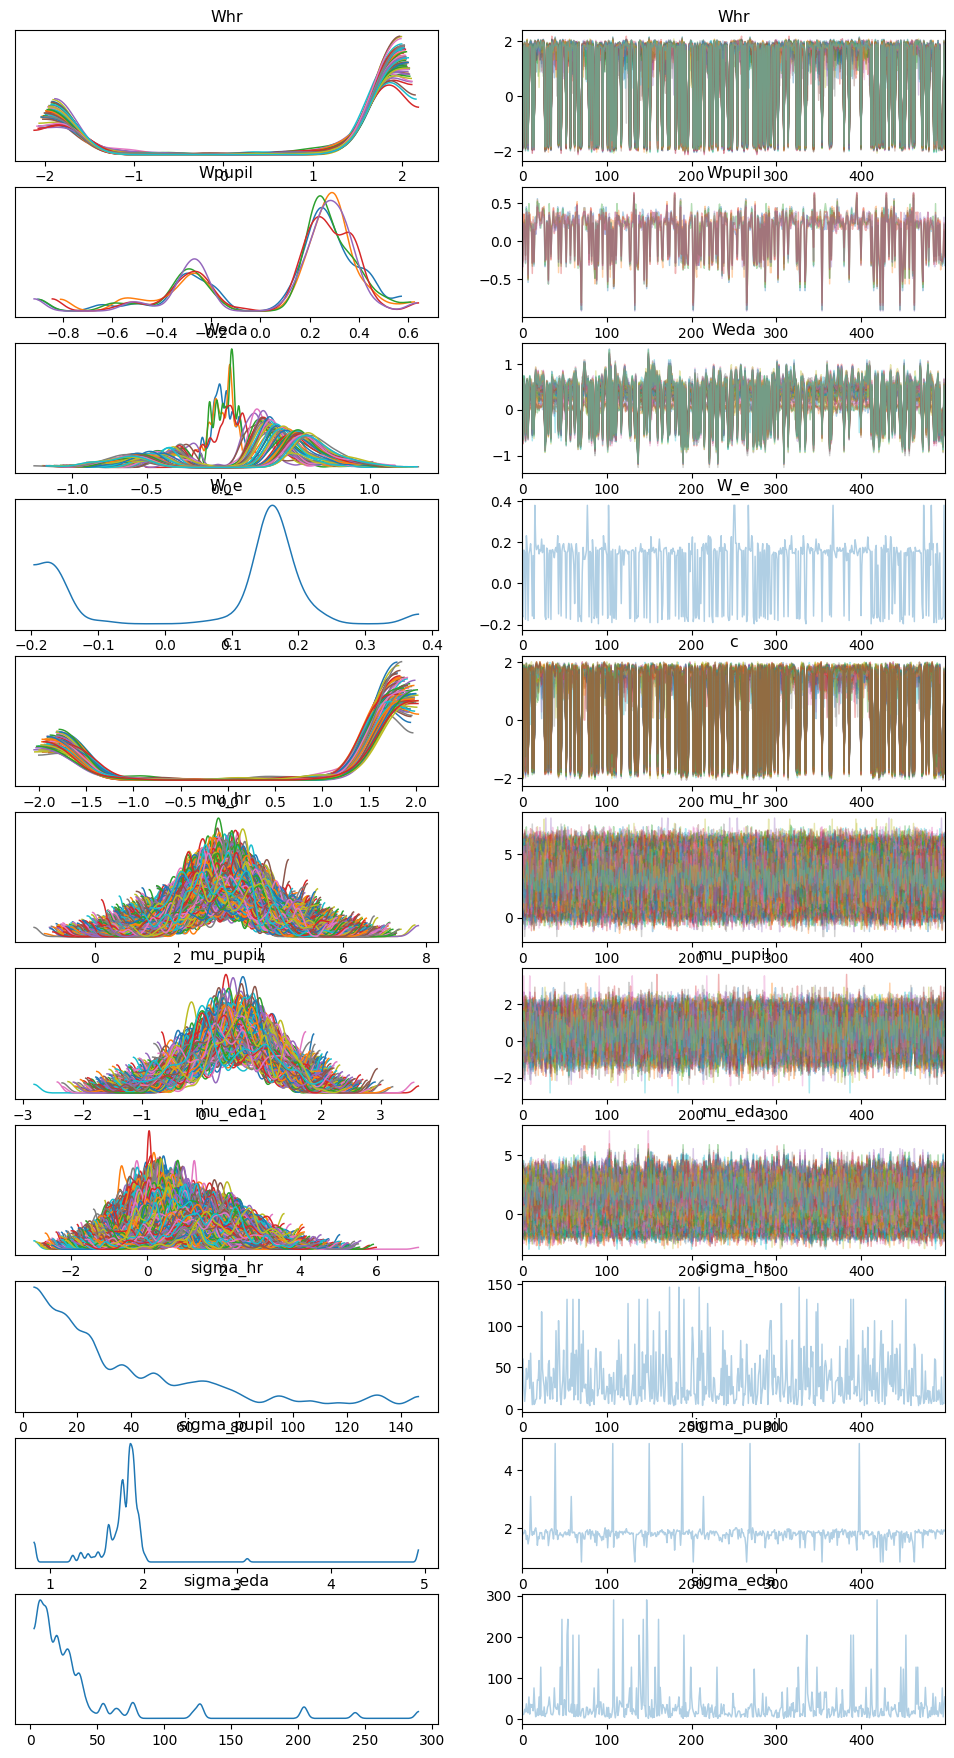

In [46]:
az.plot_trace(trace)

In [47]:
trace = az.from_netcdf('unpooled/svgd/k1_sub4_trace.nc')

array([[<AxesSubplot: title={'center': 'Whr'}>,
        <AxesSubplot: title={'center': 'Whr'}>],
       [<AxesSubplot: title={'center': 'Wpupil'}>,
        <AxesSubplot: title={'center': 'Wpupil'}>],
       [<AxesSubplot: title={'center': 'Weda'}>,
        <AxesSubplot: title={'center': 'Weda'}>],
       [<AxesSubplot: title={'center': 'W_e'}>,
        <AxesSubplot: title={'center': 'W_e'}>],
       [<AxesSubplot: title={'center': 'c'}>,
        <AxesSubplot: title={'center': 'c'}>],
       [<AxesSubplot: title={'center': 'mu_hr'}>,
        <AxesSubplot: title={'center': 'mu_hr'}>],
       [<AxesSubplot: title={'center': 'mu_pupil'}>,
        <AxesSubplot: title={'center': 'mu_pupil'}>],
       [<AxesSubplot: title={'center': 'mu_eda'}>,
        <AxesSubplot: title={'center': 'mu_eda'}>],
       [<AxesSubplot: title={'center': 'sigma_hr'}>,
        <AxesSubplot: title={'center': 'sigma_hr'}>],
       [<AxesSubplot: title={'center': 'sigma_pupil'}>,
        <AxesSubplot: title={'center'

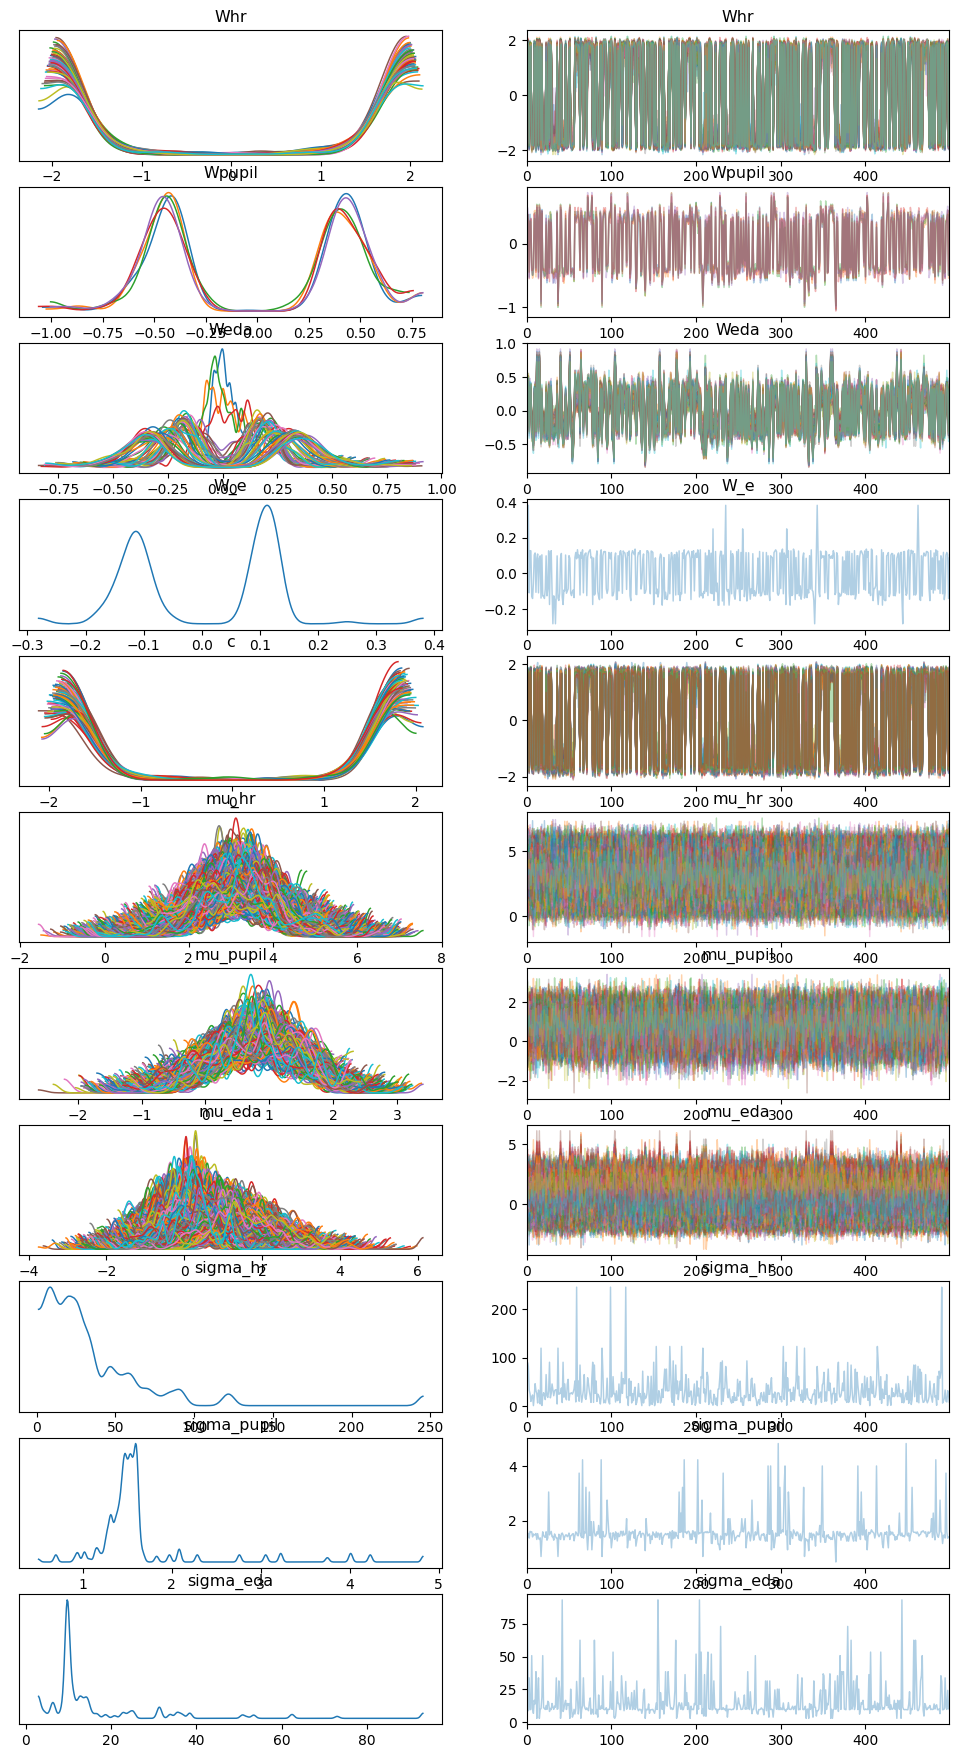

In [48]:
az.plot_trace(trace)

In [49]:
hist = np.load('unpooled/svgd/k1_sub4_approx_hist.npy')

In [50]:
hist

array([], dtype=float64)